Relacionar dos series temporales que coinciden en sus tiempos, pero que registran los valores de diferentes variables, es posible que queramos trazarlos en los mismos ejes.

In [2]:
import pandas as pd
spoti = pd.read_csv('../../data/spotify_history.csv',
                    parse_dates=['ts'],                              index_col='ts')

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
ts,,,,,,,,,,
2013-07-08 02:44:34,2J3n32GeLmMjwuAzyhcSNe,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
2013-07-08 02:45:37,1oHxIPqJyvAYHy0PVrDU98,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2013-07-08 02:50:24,487OPlneJNni3NWC8SYqhW,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
2013-07-08 02:52:40,5IyblF777jLZj1vGHG2UD3,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
2013-07-08 03:17:52,0GgAAB0ZMllFhbNc3mAodO,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-12-15 23:06:19,4Fz1WWr5o0OrlIcZxcyZtK,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
2024-12-15 23:06:21,0qHMhBZqYb99yhX9BHcIkV,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
2024-12-15 23:06:22,0HHdujGjOZChTrl8lJWEIq,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True


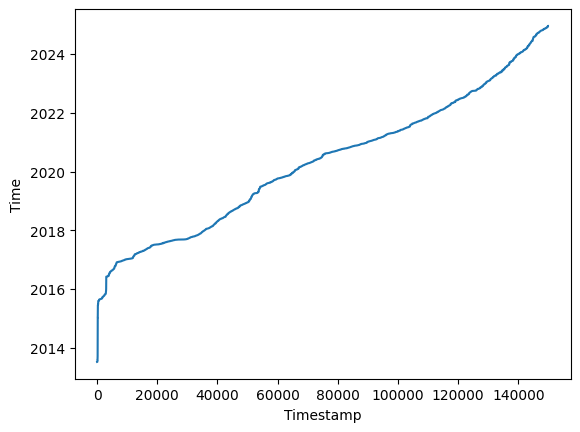

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(spoti.index)
ax.set_ylabel('Time')
ax.set_xlabel('Timestamp')
plt.show()

Nuevamente comenzamos agregando la primera variable a nuestros Ejes.
Luego utilizamos el método `twinx()` para crear un segundo eje y que comparte el mismo eje x.


Podemos hacer que la codificacion por color sea aun mas clara configurando no solo el color de las etiquetas del eje y pero tambien de las marcas del eje y y las etiquetas de las marcas del eje y.

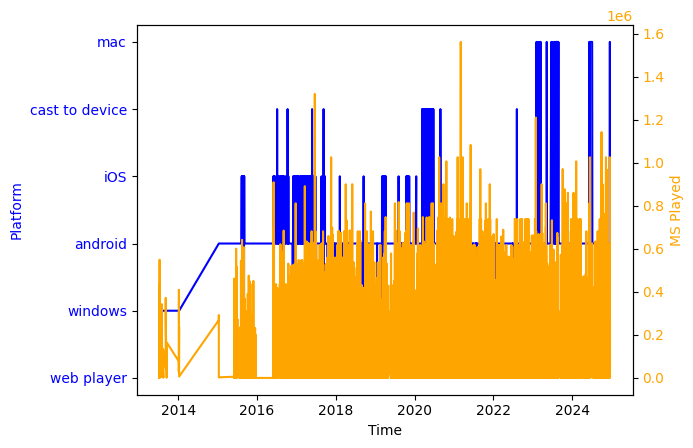

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(spoti.index,spoti['platform'], color='blue')
ax.set_ylabel('Platform', color='blue')
ax.set_xlabel('Time')
ax.tick_params(axis='y', labelcolor='blue')

ax2= ax.twinx()
ax2.plot(spoti.index,spoti['ms_played'], color='orange')
ax2.set_ylabel('MS Played', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.show()

Antes de continuar implemmentemos esto como una funcion que podamos reutilizaar.

In [22]:
def plot_time_series(axes,x,y,color,xlabel,ylabel):
    """
    Plots a time series on the given axes.

    Parameters:
    axes: matplotlib Axes object
    x: x data (time)
    y: y data (variable)
    color: color of the line
    xlabel: label for the x-axis
    ylabel: label for the y-axis
    """
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params(axis='y', labelcolor=color)

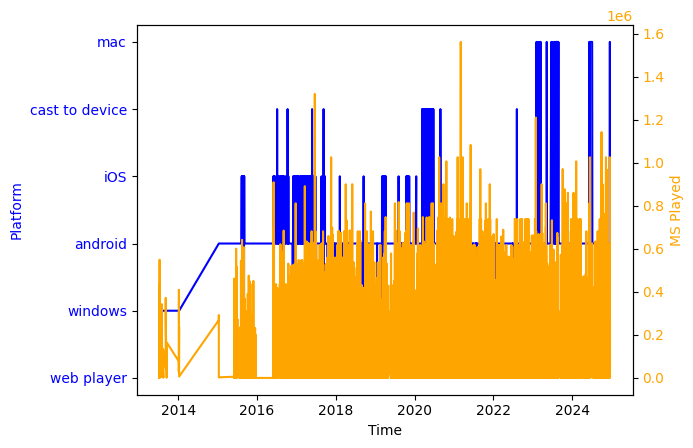

In [24]:
fig, ax = plt.subplots()

plot_time_series(ax, spoti.index, spoti['platform'], 'blue', 'Time',
                 'Platform')

ax2= ax.twinx()
plot_time_series(ax2, spoti.index, spoti['ms_played'], 'orange', 'Time', 'MS Played')

plt.show()